In [1]:
from google.colab import drive
import os
import numpy as np
import random as rn
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter

# **Dataset download**

In [2]:
drive.mount('/content/drive', force_remount=True)
!kaggle datasets download -d parsasam/captcha-dataset
!unzip -q -n /content/captcha-dataset.zip -d /content/CAPTCHA
!kaggle datasets download -d parsasam/captcha-dataset

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/parsasam/captcha-dataset
License(s): CC0-1.0
 99% 353M/356M [00:05<00:00, 94.3MB/s]
100% 356M/356M [00:05<00:00, 74.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/parsasam/captcha-dataset
License(s): CC0-1.0
captcha-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
os.environ["PYTHONHASHSEED"] = "0"          # Setting the random seed for reproducibility
np.random.seed(150)
rn.seed(150)
tf.random.set_seed(150)

# **Dataset analysis**

In [4]:
path = '/content/CAPTCHA'

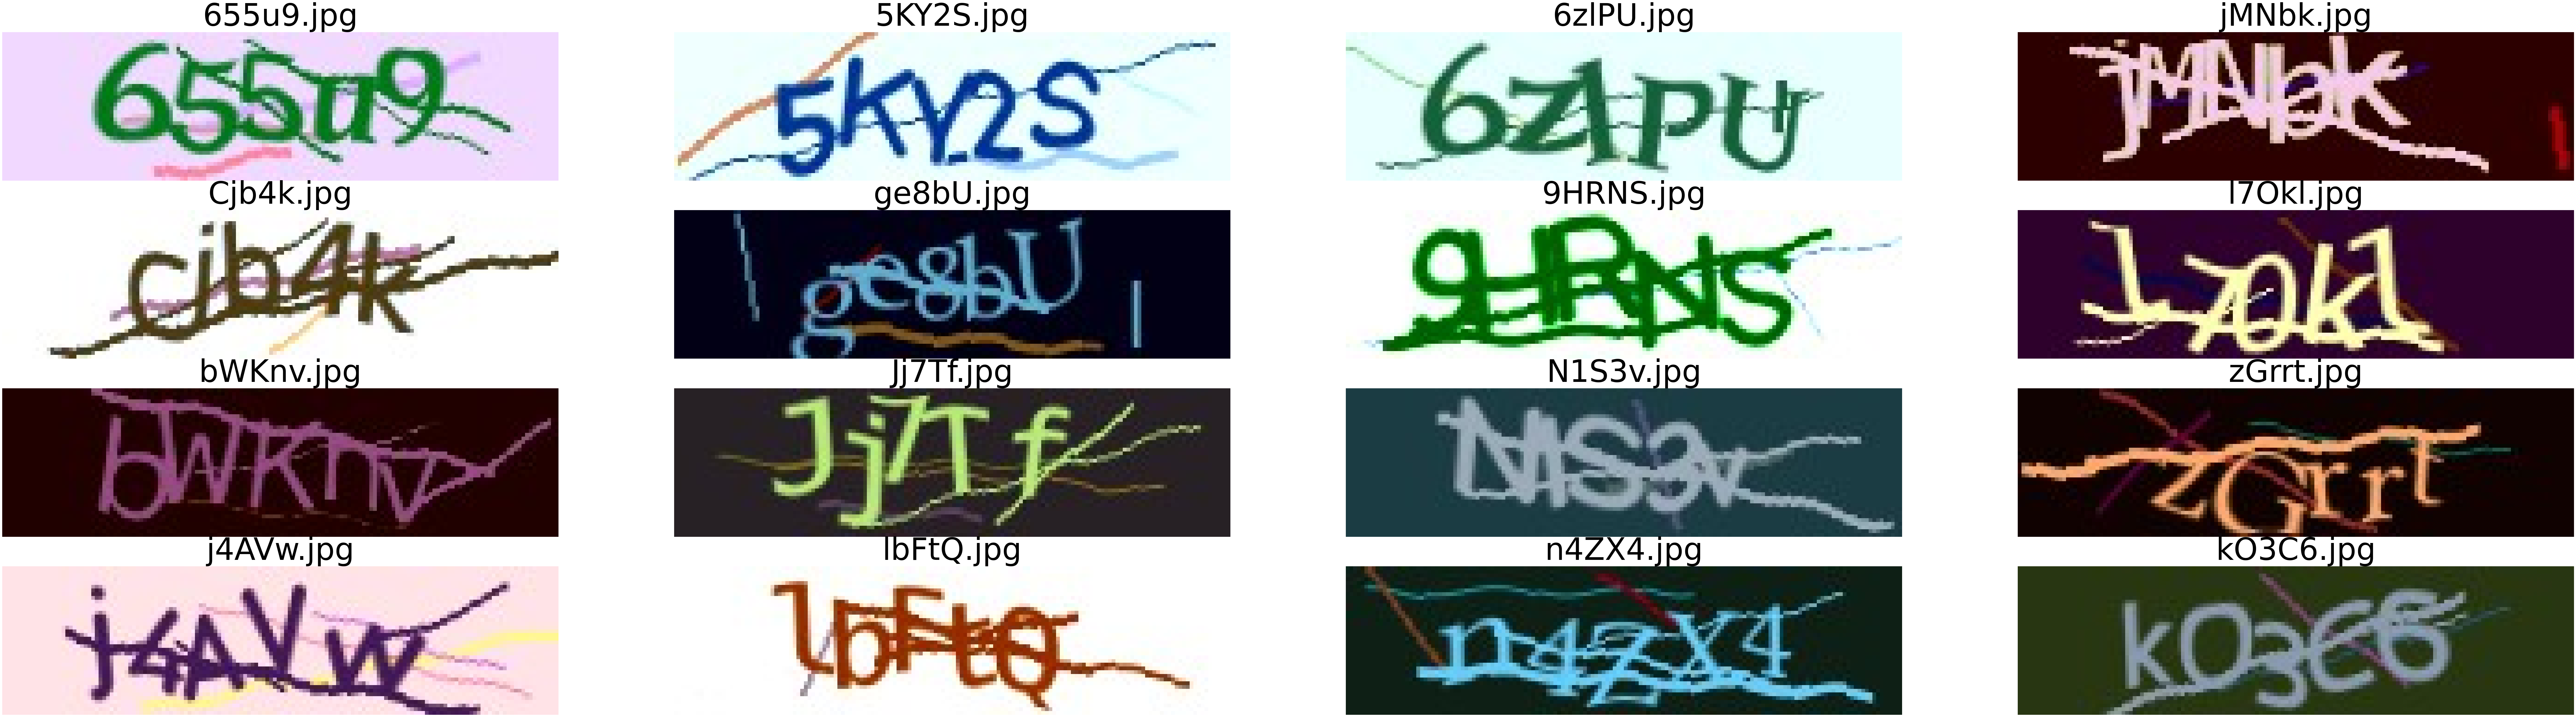

In [5]:
try:
    files = os.listdir(path)

    fig, axes = plt.subplots(4, 4, figsize=(150, 40))       # 4x4 grid to display images

    for i in range(4):
        for j in range(4):
            image_path = os.path.join(path, files[i * 4 + j])       # Getting img path
            img = mpimg.imread(image_path)          # Reading img
            axes[i, j].imshow(img)          # Showing img
            axes[i, j].axis('off')
            axes[i, j].set_title(files[i * 4 + j], fontsize=100)    #Img caption

    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

Total number of images in /content/CAPTCHA: 113062

['655u9.jpg', '5KY2S.jpg', '6zlPU.jpg', 'jMNbk.jpg', 'Cjb4k.jpg', 'ge8bU.jpg', '9HRNS.jpg', 'l7Okl.jpg', 'bWKnv.jpg', 'Jj7Tf.jpg', 'N1S3v.jpg', 'zGrrt.jpg', 'j4AVw.jpg', 'lbFtQ.jpg', 'n4ZX4.jpg', 'kO3C6.jpg', 'LFgNp.jpg', 'AeJp9.jpg', 'heNBt.jpg', 'APik9.jpg', 'bWTMB.jpg', 'z9nrt.jpg', 'nxHcr.jpg', 'd7Zy1.jpg', 'NMh3g.jpg', 'Nssja.jpg', 'kU9gs.jpg', '98BnI.jpg', 'cLPXE.jpg', 'hzhVc.jpg', 'DFY1Z.jpg', 'RQAbG.jpg', 'VcKlE.jpg', 'bziaT.jpg', 'JFU4L.jpg', 'g86JG.jpg', 'qeGpG.jpg', '5GVlb.jpg', 'QGibW.jpg', 'vudTk.jpg', 'MUWhQ.jpg', 'WuCtf.jpg', 'qSM2H.jpg', 'BKvvU.jpg', 'uPV1h.jpg', 'yKUyG.jpg', 'YbxQT.jpg', 'uFVdj.jpg', 'xkTUX.jpg', 'Bj3In.jpg', 'KR81q.jpg', 'QGiaz.jpg', 'GPO5v.jpg', 'bIdrE.jpg', 'TsQVv.jpg', 'lcMDT.jpg', 'x1LXQ.jpg', 'CX1A7.jpg', 'u7pMQ.jpg', 'NccRW.jpg', 'GLPlq.jpg', 'egsj4.jpg', 'kWxxm.jpg', '1OCJZ.jpg', 'OplWi.jpg', 'FZUG4.jpg', 'MdDyz.jpg', 'bp7T8.jpg', 'PJhwv.jpg', 'mFPUS.jpg', 'fCikv.jpg', 'NGTsb.jpg', 'UJxtD.jpg'

<ipython-input-6-8d89154d695b>:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(chars))(np.arange(len(chars)))        # Different colors for each bar


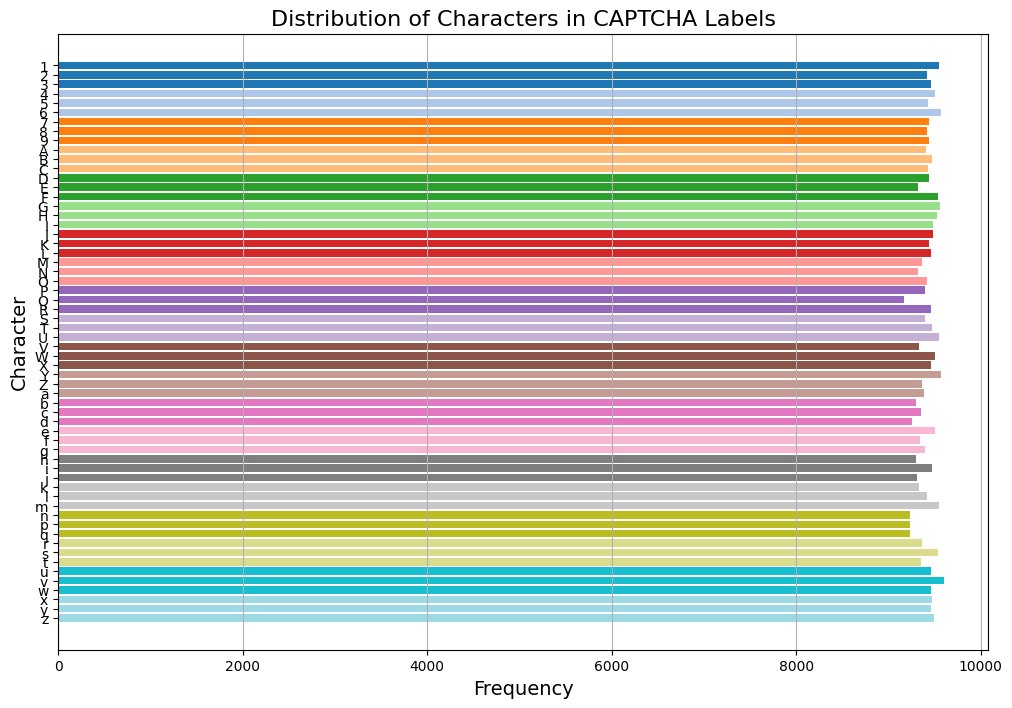

In [6]:
def count_files_in_folder(path):
    try:
        files = os.listdir(path)
        num_files = len(files)
        return num_files
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def get_file_list(path):
    files = os.listdir(path)
    captchas = []
    for file in files:
        captchas.append(file)
    return captchas


def extract_char_frequencies(path):
    char_counter = Counter()
    for filename in os.listdir(path):
        filename = os.path.splitext(filename)[0]  # Remove file extension
        char_counter.update(filename)  # Update character counts
    return char_counter


def extract_chars(path):
    char_list = []
    for filename in os.listdir(path):
        filename = os.path.splitext(filename)[0]
        char_list.extend(filename)
    char_list.sort()

    unique_chars = []
    for char in char_list:
        if char not in unique_chars:
            unique_chars.append(char)

    tot_chars = len(unique_chars)

    return tot_chars, unique_chars


def plot_char_distribution(char_counter):
    chars = sorted(char_counter.keys())  # Sort characters alphabetically
    counts = [char_counter[char] for char in chars]  # Get counts in the same order
    colors = plt.cm.get_cmap('tab20', len(chars))(np.arange(len(chars)))        # Different colors for each bar
    plt.figure(figsize=(12, 8))
    plt.barh(chars, counts, color=colors)       # Horizontal bar chart
    plt.ylabel('Character', fontsize=14)
    plt.xlabel('Frequency', fontsize=14)
    plt.title('Distribution of Characters in CAPTCHA Labels', fontsize=16)
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.show()


tot_images = count_files_in_folder(path)

if tot_images is not None:
    print(f'Total number of images in /content/CAPTCHA: {tot_images}')
    print()
    print(get_file_list(path))
    print()
    tot_chars, char_set = extract_chars(path)
    print(f'{tot_chars} chars: {char_set}')
    print()
    char_counter = extract_char_frequencies(path)
    plot_char_distribution(char_counter)
else:
    print('Failed to count files.')